<h1 align="center"><b>Data-Driven Insights for Early Breast Cancer Diagnosis</b></h1>
<p style="text-align: center;">By Juan Carlos Dominguez</p>

# **Business Understanding**

## **Context**
Breast cancer is one of the most common cancers affecting women worldwide, with early detection and accurate diagnosis playing a critical role in improving patient outcomes. Modern diagnostic techniques generate vast amounts of data, providing opportunities for data-driven insights to enhance clinical decision-making and support medical professionals in identifying patterns that could aid early intervention.

This project was inspired by a deeply personal experience: a close relative was recently diagnosed with breast cancer. Witnessing the challenges and emotional toll of navigating the diagnosis and treatment process underscored the importance of timely and accurate diagnoses. This motivated me to explore the potential of data analysis in understanding breast cancer characteristics and contributing to better patient outcomes.

## **Objective**
The primary goal of this project is to analyze breast cancer diagnostic data to uncover meaningful insights that can aid in understanding the distinctions between benign and malignant tumors. By leveraging data analysis, the project aims to:
- Identify key patterns and trends in tumor features.
- Understand the relationship between specific features and the likelihood of malignancy.
- Present findings through visual dashboards that are both accessible and informative for stakeholders such as healthcare professionals, researchers, and patients.

## **Potential Stakeholders**
1. **Healthcare Professionals**: To support evidence-based decision-making by providing insights into diagnostic data.
2. **Researchers**: To identify patterns that could inform the development of better diagnostic tools or algorithms.
3. **Patients and Families**: To raise awareness of diagnostic factors and empower informed discussions with medical teams.

## **Key Questions**
1. What are the primary features distinguishing benign from malignant tumors in the dataset?
2. Can the data reveal any trends or correlations that might aid in early detection or prediction of malignancy?
3. How can these insights be visualized effectively to facilitate understanding and support informed decision-making?

## **Scope**
This project focuses on analyzing the **Breast Cancer Dataset** from Kaggle, which contains diagnostic information derived from fine-needle aspirates of breast masses. By utilizing SQL for data management, Python for in-depth analysis and modeling, and Tableau for interactive visualization, the project aims to bridge the gap between raw data and actionable insights.

## **Call to Action**
This analysis is a step toward understanding the diagnostic factors associated with breast cancer. It is an invitation to collaborate, learn, and contribute to the broader mission of improving early detection and treatment outcomes for breast cancer patients. Whether you're a healthcare professional, researcher, or data enthusiast, your feedback and insights are invaluable in refining this analysis and expanding its impact. Together, we can leverage the power of data to make a difference in the lives of patients and their families.


# **Data Cleaning**

In [1]:
# Modules & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

### **Loading the Dataset**

In [2]:
# Path
path = '../Data/Raw/breast-cancer.csv'

# Reading csv file
df_raw = pd.read_csv(path)

# Displaying first 5 rows of dataframe
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
# Checking dimension of the dataframe (# of rows & cols)
df_raw.shape

(569, 32)

In [4]:
# Concise summary of the dataframe
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## **Dataset Features Overview**

The dataset contains various measurements and attributes related to breast tumors. Below is a detailed description of the columns:

### **Identifiers**
- **`id`**: A unique identifier for each tumor record.
- **`diagnosis`**: The diagnosis of the tumor & the target variable for this project:
  - `M`: Malignant (cancerous).
  - `B`: Benign (non-cancerous).

### **Mean Measurements**
These columns represent the average values calculated for each tumor's features:
- **`radius_mean`**: The average distance from the center of the tumor to its perimeter, reflecting the tumor's size.
- **`texture_mean`**: The average standard deviation of gray-scale values, measuring the smoothness or coarseness of the tumor's texture.
- **`perimeter_mean`**: The average length of the tumor's boundary perimeter.
- **`area_mean`**: The average surface area of the tumor.
- **`smoothness_mean`**: The average local variation in radius lengths, indicating how smooth the tumor's surface is.
- **`compactness_mean`**: The average compactness (calculated as perimeter² / area - 1.0), representing the roundness of the tumor.
- **`concavity_mean`**: The average severity of inward-curving portions of the tumor's boundary.
- **`concave points_mean`**: The average number of concave (inward) points on the tumor's boundary.
- **`symmetry_mean`**: The average symmetry of the tumor about its center.
- **`fractal_dimension_mean`**: The average fractal dimension, indicating the complexity of the tumor's surface.

### **Standard Error (SE) Measurements**
These columns capture the variability in the measurements:
- **`radius_se`**: Standard error of the radius.
- **`texture_se`**: Standard error of the texture.
- **`perimeter_se`**: Standard error of the perimeter.
- **`area_se`**: Standard error of the area.
- **`smoothness_se`**: Standard error of the smoothness.
- **`compactness_se`**: Standard error of the compactness.
- **`concavity_se`**: Standard error of the concavity.
- **`concave points_se`**: Standard error of the concave points.
- **`symmetry_se`**: Standard error of the symmetry.
- **`fractal_dimension_se`**: Standard error of the fractal dimension.

### **Worst (Largest) Measurements**
These columns represent the largest values observed for each feature:
- **`radius_worst`**: Largest radius observed.
- **`texture_worst`**: Largest texture value observed.
- **`perimeter_worst`**: Largest perimeter length observed.
- **`area_worst`**: Largest area observed.
- **`smoothness_worst`**: Largest smoothness value observed.
- **`compactness_worst`**: Largest compactness value observed.
- **`concavity_worst`**: Largest concavity value observed.
- **`concave points_worst`**: Largest number of concave points observed.
- **`symmetry_worst`**: Largest symmetry value observed.
- **`fractal_dimension_worst`**: Largest fractal dimension observed.

#### **Summary**
For each tumor, the dataset provides:
- **Mean measurements**: Average values for key features.
- **Standard error measurements**: Variability in the measurements.
- **Worst measurements**: Largest observed values for the features.

These measurements collectively describe the physical characteristics of the tumors and aid in distinguishing between benign and malignant cases.

### **Verifying Data Quality: Null Values, Duplicates**

In [5]:
# Checking for null values in dataframe
df_raw.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# Checking for duplicate values
df_raw.duplicated().sum()

0

##### **Note:** No null or duplicate values present 

### **Preprocessing Attributes**

In [7]:
# Preprocessing Target Attribute
le = LabelEncoder()
df_raw['diagnosis'] = le.fit_transform(df_raw.diagnosis)
df_raw.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Dropping Unnecessary Attributes
df_raw.drop(['id'], axis=1, inplace=True)

In [9]:
# Standarizing the Attributes for Processing 
X = df_raw.drop(columns=['diagnosis'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardizes the features (all columns except diagnosis)
X_scaled = scaler.fit_transform(X)

# Creates a new DataFrame with standardized features and original 'diagnosis' column
df_processed = pd.DataFrame(X_scaled, columns=X.columns)

# Adds 'diagnosis' column back to the DataFrame
df_processed['diagnosis'] = df_raw['diagnosis']

# Shows the first few rows of the scaled DataFrame
df_processed.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [10]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

### **Saving Processed Dataframe**

In [11]:
# Defines the file path for saving the processed data
processed_file_path = '../Data/Processed/df_processed.csv'

# Saves the df_processed dataframe to the CSV file
df_processed.to_csv(processed_file_path, index=False)

print(f"Processed data saved to: {processed_file_path}")


Processed data saved to: ../Data/Processed/df_processed.csv


# **Exploratory Data Analysis**

In [12]:
# Modules & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Reources:
- https://www.kaggle.com/code/kanuriviveknag/breast-cancer-prediction
- https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?resource=download


### **Loading the Processed Dataset**

In [13]:
# Path
path = '../Data/Processed/df_processed.csv'

# Reading csv file
df_processed = pd.read_csv(path)

# Displaying first 5 rows of dataframe
df_processed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


### **Distribution of Diagnosis**

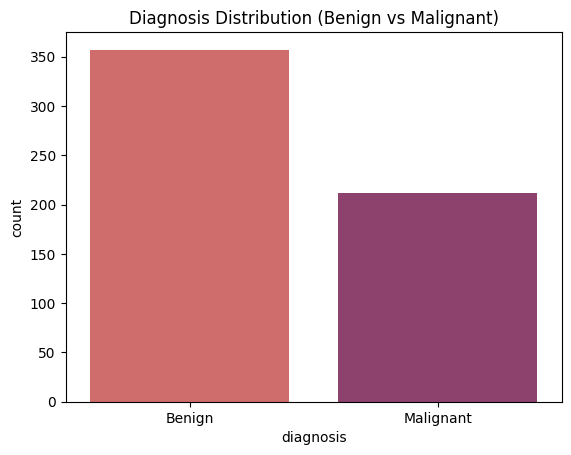

In [14]:
sns.countplot(data=df_processed, x='diagnosis', hue='diagnosis', palette='flare', legend=False)
plt.title('Diagnosis Distribution (Benign vs Malignant)')
plt.xticks(ticks=[0, 1], labels=['Benign', 'Malignant'])

plt.show()

The histogram illustrates the distribution of diagnoses within the dataset, providing a clear understanding of the prevalence of benign and malignant cases. Out of a total of 569 samples, 350 cases (61.5%) are classified as benign, representing the majority of the dataset. Conversely, 219 cases (38.5%) are classified as malignant. This imbalance in the dataset highlights a moderately skewed class distribution, which is critical to consider in subsequent modeling phases. Ensuring that this class imbalance is addressed is essential to avoid potential bias in predictive performance, particularly in evaluating the model's sensitivity and specificity to malignant cases.

### **Histogram of Attributes**

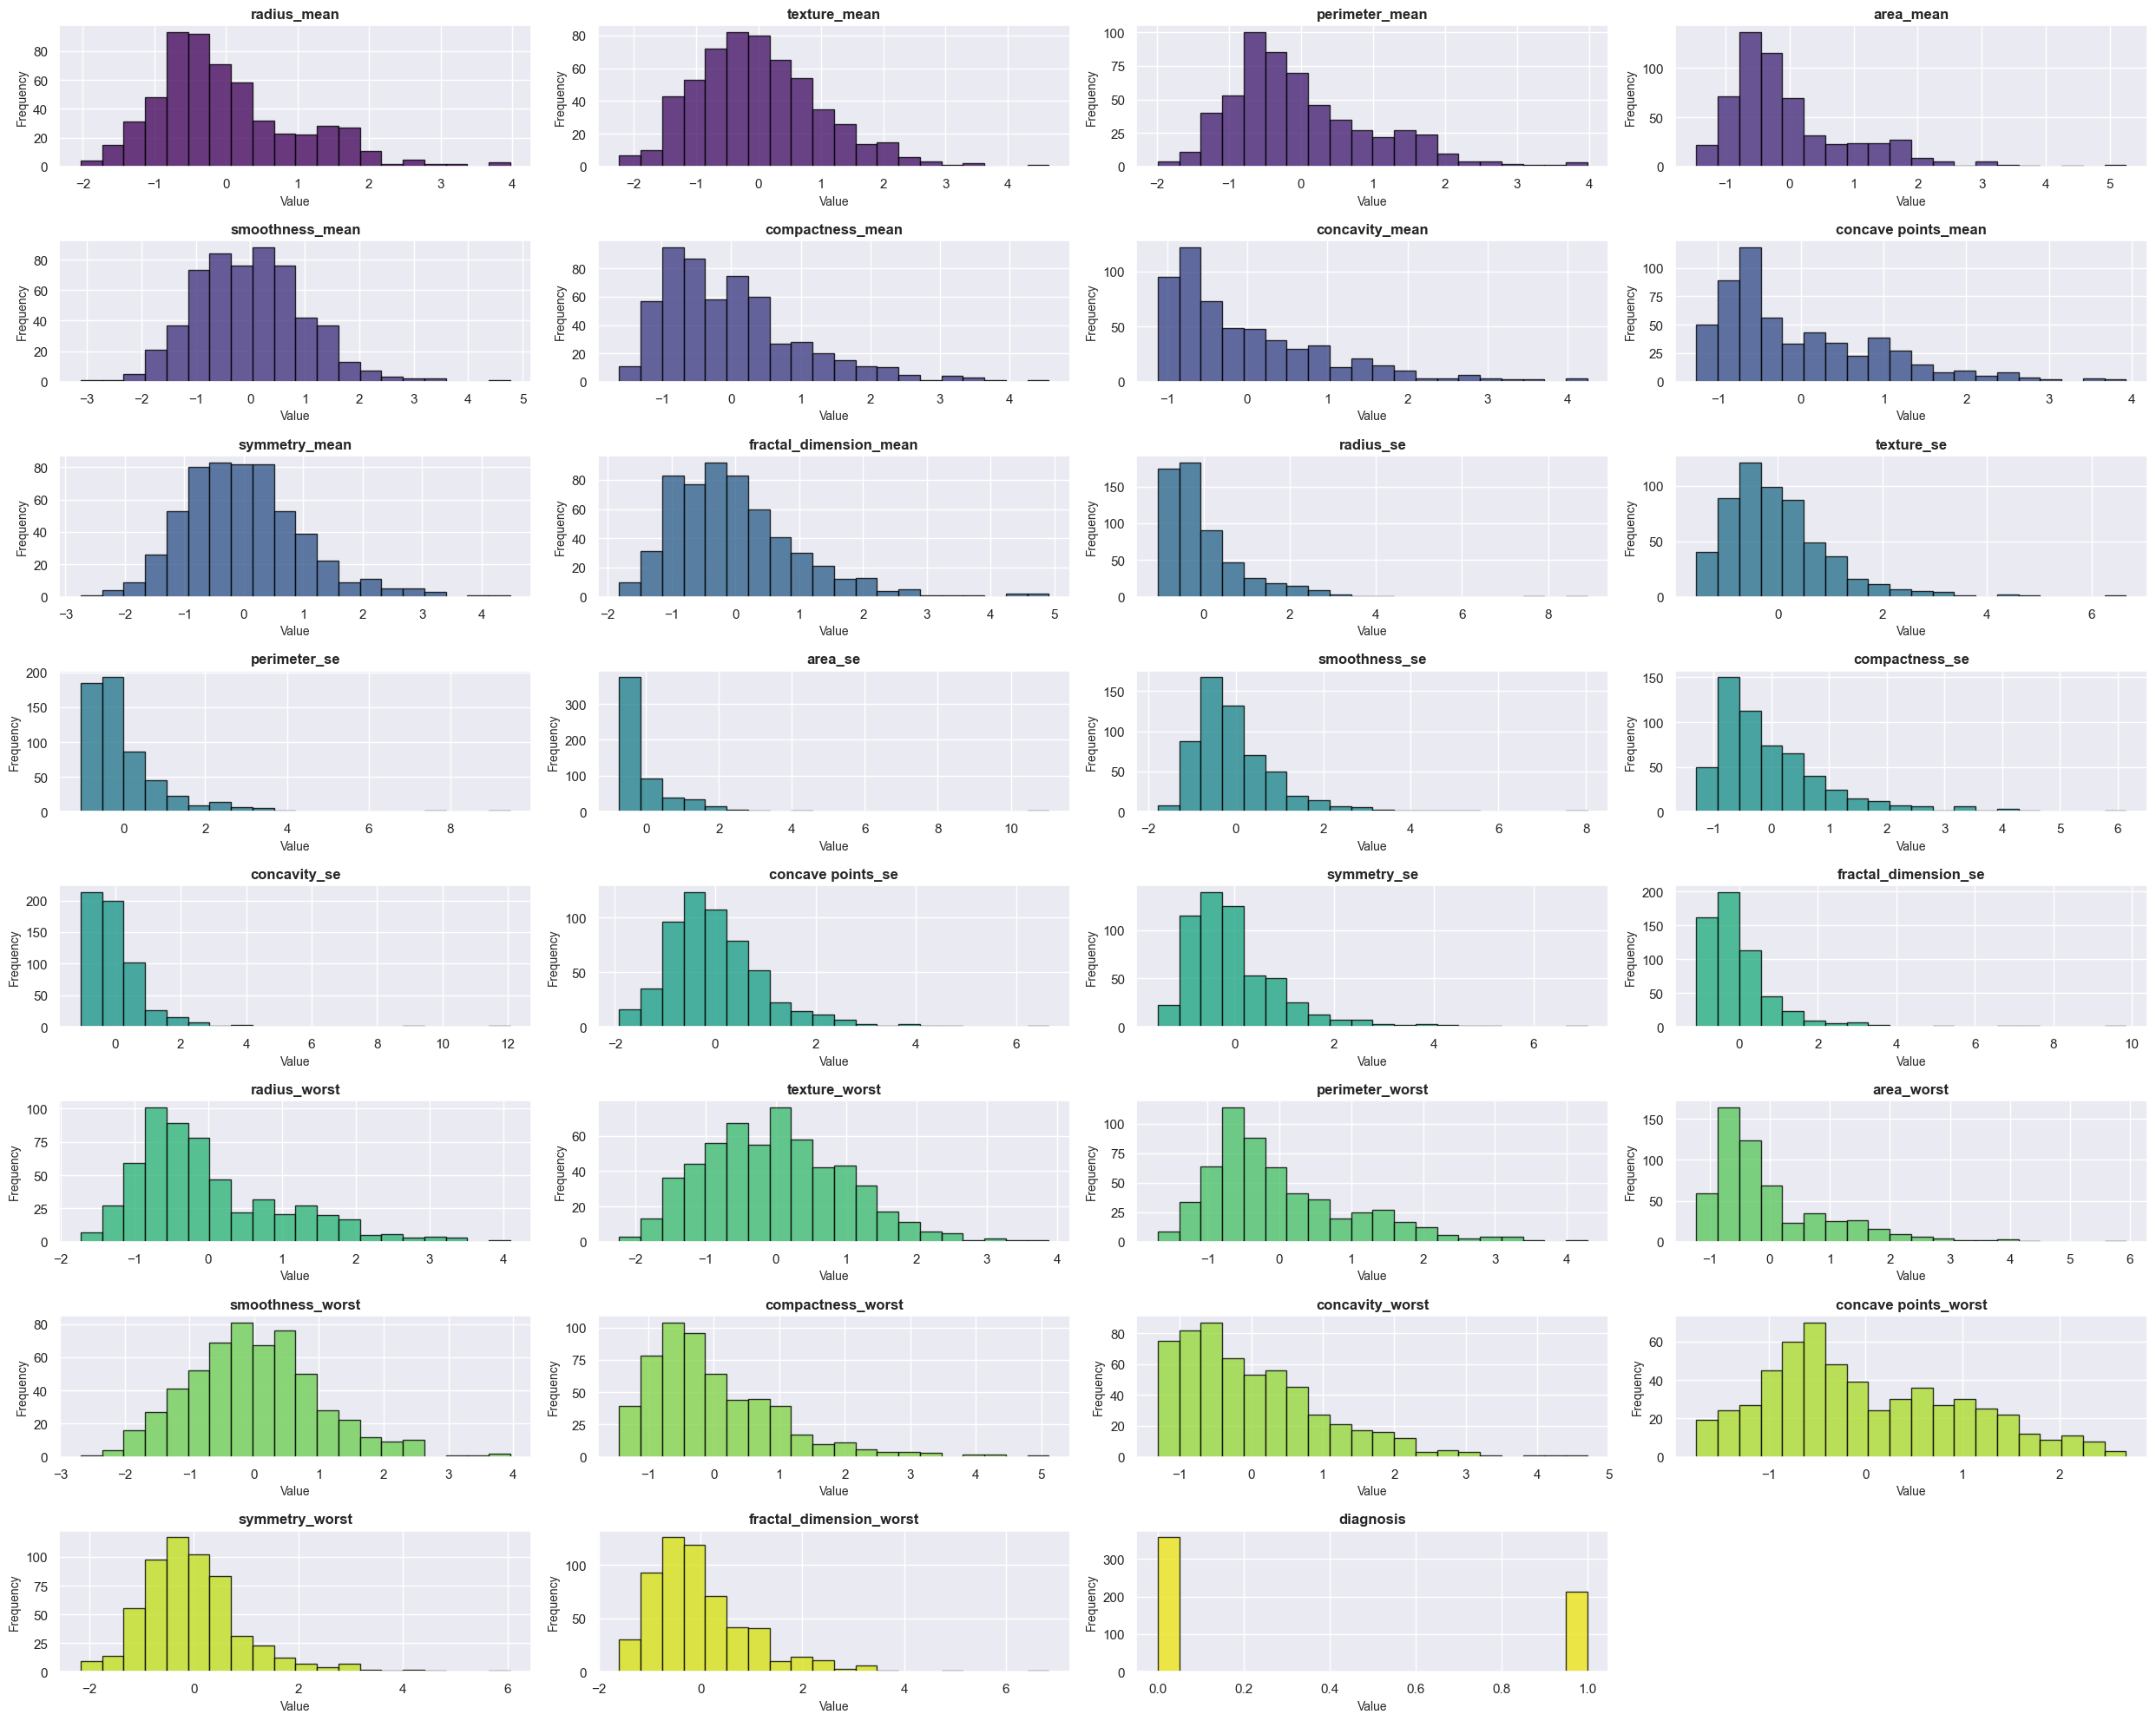

In [15]:
# Histograms of Attributes 

sns.set_theme(style="darkgrid")
colors = sns.color_palette("viridis", len(df_processed.columns))

fig, axes = plt.subplots(8, 4, figsize=(25, 20)) 
axes = axes.flatten() 

for i, column in enumerate(df_processed.columns):
    ax = axes[i]
    ax.hist(df_processed[column], bins=20, color=colors[i], edgecolor="black", alpha=0.8)
    ax.set_title(column, fontsize=12, weight='bold')  
    ax.set_xlabel("Value", fontsize=10) 
    ax.set_ylabel("Frequency", fontsize=10) 

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() 
plt.show()


In [16]:
stats = df_processed.describe().T
stats['median'] = df_processed.median()
stats = stats[['mean', 'median', 'std', 'min', 'max']]  # Select relevant metrics
stats

,mean,median,std,min,max
radius_mean,-1.373633e-16,-0.215082,1.000880,-2.029648,3.971288
texture_mean,7.492542e-17,-0.104636,1.000880,-2.229249,4.651889
perimeter_mean,-1.248757e-16,-0.235980,1.000880,-1.984504,3.976130
area_mean,-2.122887e-16,-0.295187,1.000880,-1.454443,5.250529
smoothness_mean,-8.116921e-16,-0.034891,1.000880,-3.112085,4.770911
compactness_mean,1.873136e-16,-0.221940,1.000880,-1.610136,4.568425
concavity_mean,4.995028e-17,-0.342240,1.000880,-1.114873,4.243589
concave points_mean,-3.746271e-17,-0.397721,1.000880,-1.261820,3.927930
symmetry_mean,1.748260e-16,-0.071627,1.000880,-2.744117,4.484751
fractal_dimension_mean,4.838933e-16,-0.178279,1.000880,-1.819865,4.910919


# Analysis of Dataset Statistics

## Overview
This dataset presents descriptive statistics for various features in a breast cancer dataset, with all features standardized to have a mean near zero and a standard deviation close to 1. Below is a detailed analysis of each statistic for all features.

## Key Observations

### 1. **Standardization**
   - All features have a standard deviation (`std`) of approximately **1.000880**, indicating successful standardization.
   - The `mean` values for most features are extremely close to zero, with only small numerical artifacts due to floating-point precision.

### 2. **Range of Values**
   - Each feature displays a wide range of values:
     - **Min**: The smallest values range from approximately `-3` to `-2` for most features, but some features (e.g., `area_se` and `concavity_se`) have minimum values closer to `-0.7` or `-1.0`.
     - **Max**: Maximum values vary significantly, with the highest outliers being `12.07` for `concavity_se` and `11.04` for `area_se`.

### 3. **Skewness and Distribution**
   - For many features, the `median` values deviate from zero more than the `mean`, suggesting slight skewness in the distributions.
   - Positive skew is notable in features like:
     - `area_mean` (max: `5.25`)
     - `radius_se` (max: `8.91`)
     - `concavity_se` (max: `12.07`)

   - Negative skew is subtler but visible in features like `smoothness_mean`.

### 4. **Outliers**
   - Features with exceptionally high maximum values compared to the interquartile range (e.g., `concavity_se`, `radius_se`, `area_se`) likely have outliers that could be investigated further.

### 5. **Diagnosis Feature**
   - **Diagnosis** is a binary variable with a mean of `0.372583`. 
   - This suggests a class imbalance, as approximately **37.3%** of samples belong to the positive class (malignant).

## Individual Feature Insights

| **Feature**                | **Mean**             | **Median**   | **Notable Observations**                                                                 |
|----------------------------|---------------------|--------------|------------------------------------------------------------------------------------------|
| **radius_mean**            | `-1.37e-16`        | `-0.215`     | Range is balanced with max `3.97` and min `-2.03`.                                       |
| **texture_mean**           | `7.49e-17`         | `-0.105`     | Slight positive skew; max `4.65`.                                                        |
| **area_mean**              | `-2.12e-16`        | `-0.295`     | Positively skewed with significant outliers (max `5.25`).                                |
| **concavity_mean**         | `4.99e-17`         | `-0.342`     | Skewed toward higher values; max `4.24`.                                                |
| **radius_se**              | `2.25e-16`         | `-0.292`     | High max (`8.91`) indicates potential outliers.                                          |
| **concavity_se**           | `1.69e-16`         | `-0.199`     | Extreme max (`12.07`) relative to the range indicates possible outliers.                 |
| **area_se**                | `-1.25e-16`        | `-0.348`     | Max (`11.04`) reflects another feature with outlier potential.                           |
| **diagnosis**              | `0.372583`         | `0.000`      | Indicates class imbalance, with fewer malignant cases.                                   |

## Recommendations
1. **Outlier Treatment**: Investigate features like `concavity_se`, `area_se`, and `radius_se` for significant outliers. Consider methods like:
   - Trimming extreme values.
   - Transformations to reduce skewness.

2. **Class Imbalance**: Address the imbalance in the `diagnosis` variable using techniques such as:
   - Oversampling the minority class.
   - Utilizing class-weighted metrics in model evaluation.

3. **Further Visualizations**: Plot histograms or boxplots for features with extreme maximum values to visually inspect distributions.

4. **Correlation Analysis**: Follow-up analysis should examine correlations between these features and the target (`diagnosis`) to identify the most predictive variables.


### **Heatmap of Correlation Among Attributes**

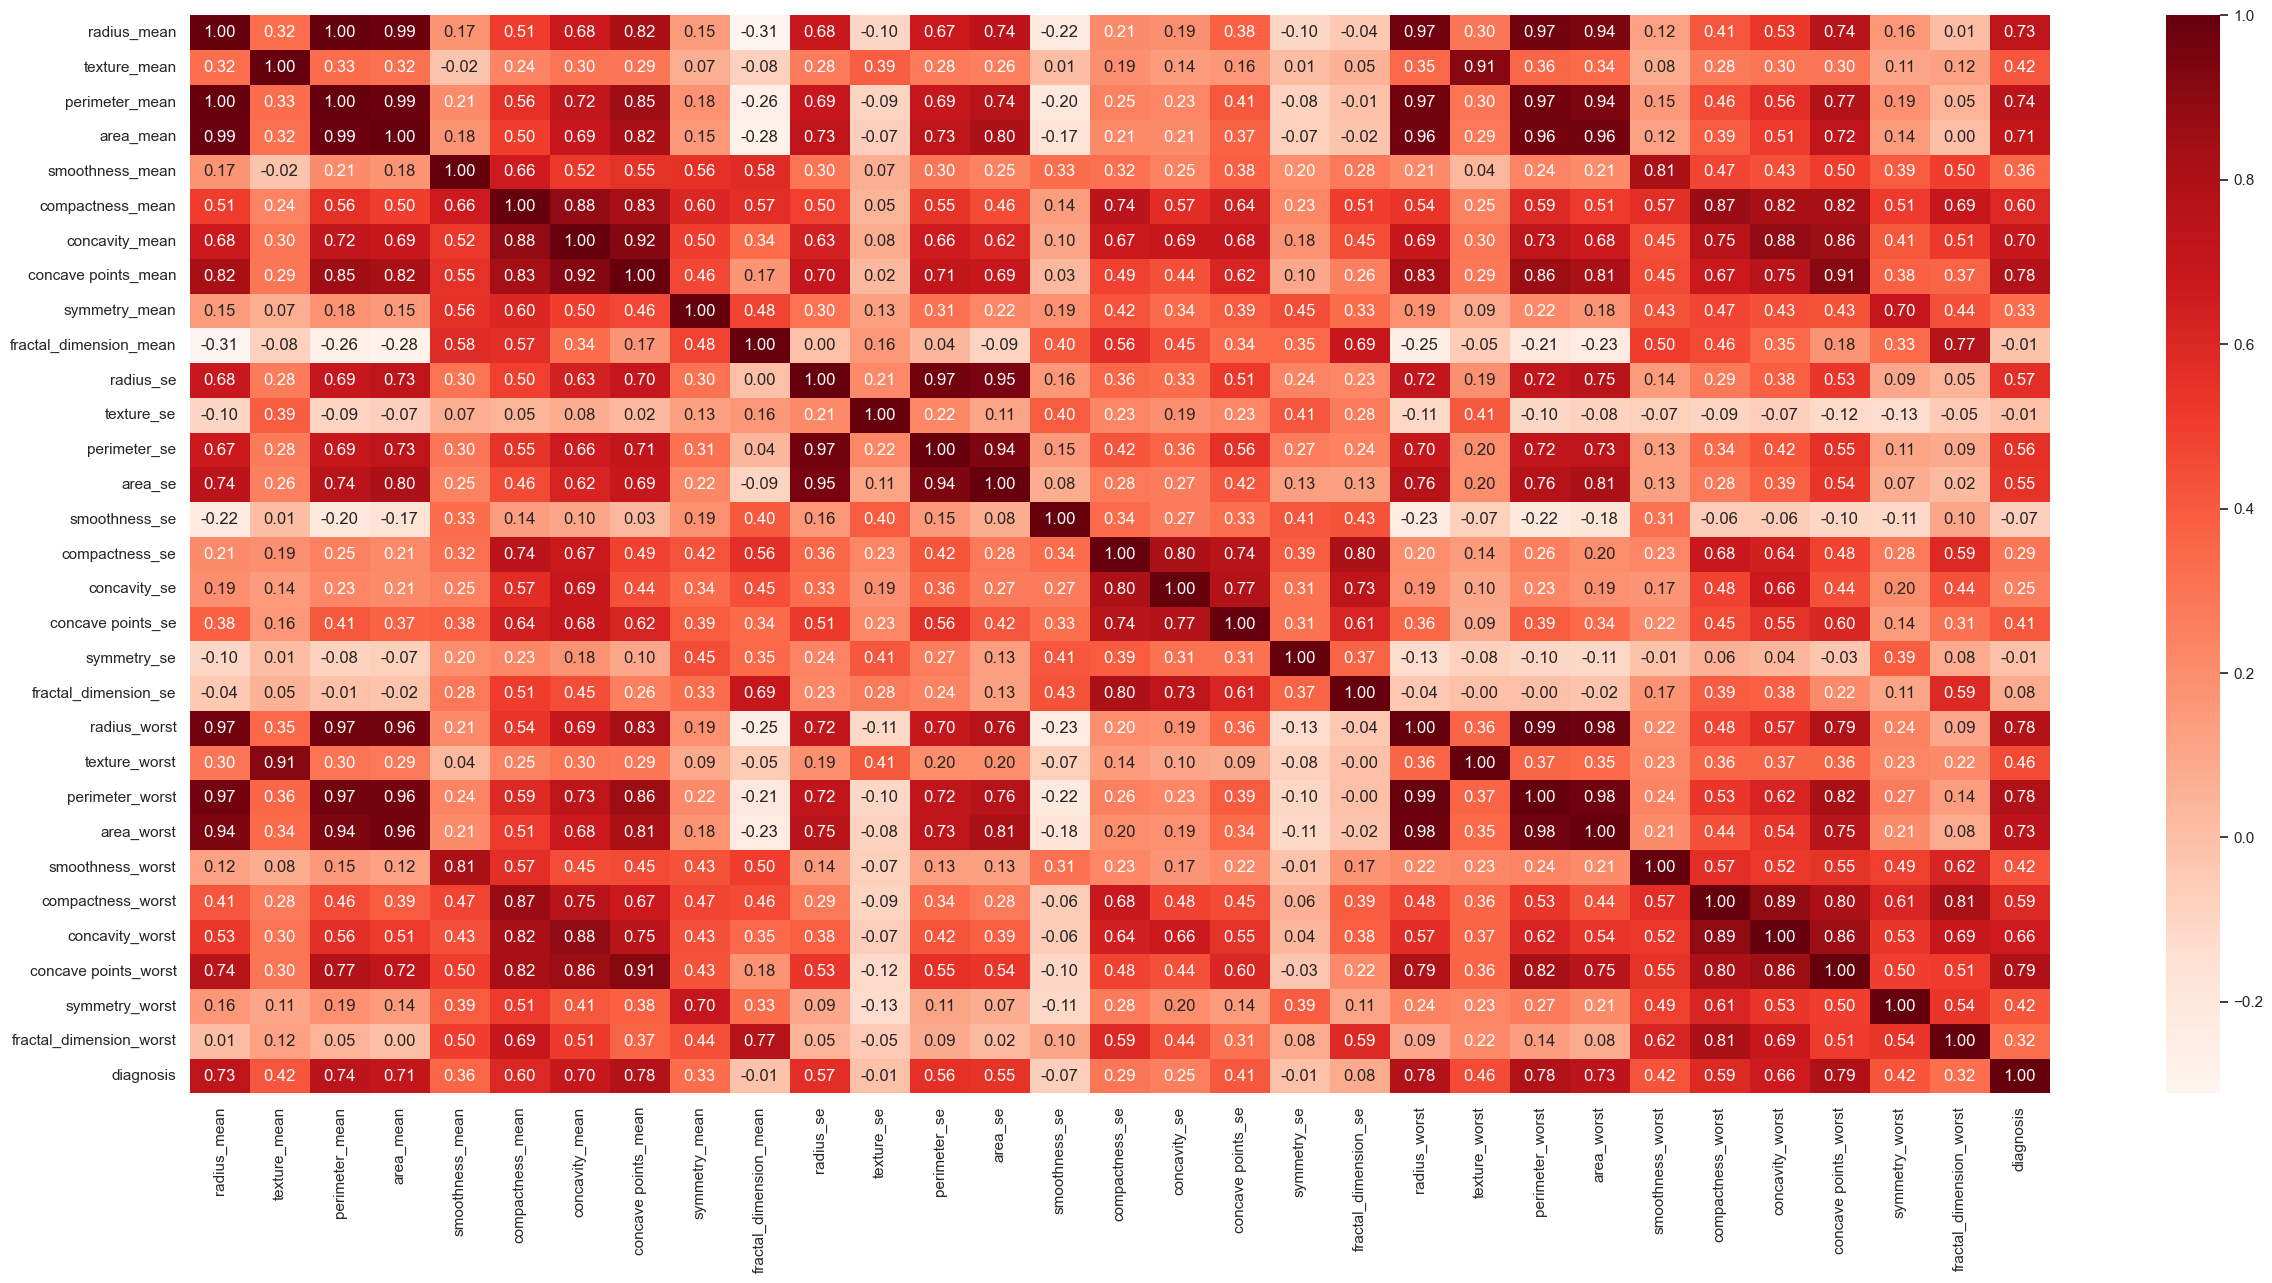

In [17]:
# Heatmap of Attributes
correlation_matrix = df_processed.corr()

plt.figure(figsize=(30, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f')
plt.show()

In [18]:
# Threshold for strong correlation
threshold = 0.7

# Flattens the matrix to analyze
correlation_pairs = correlation_matrix.unstack()
# Sorts pairs by absolute value of correlation
sorted_pairs = correlation_pairs.abs().sort_values(ascending=False)

# Filters for strong correlations (excluding self-correlations)
strong_correlations = sorted_pairs[(sorted_pairs > threshold) & (sorted_pairs < 1)]

# Weak correlations (close to zero)
weak_correlations = sorted_pairs[sorted_pairs < 0.1]

# Display insights
print("### Strong Correlations (>|0.7|):")
print(strong_correlations)

print("\n### Weak Correlations (<0.1):")
print(weak_correlations)

### Strong Correlations (>|0.7|):
perimeter_mean       radius_mean            0.997855
radius_mean          perimeter_mean         0.997855
radius_worst         perimeter_worst        0.993708
perimeter_worst      radius_worst           0.993708
area_mean            radius_mean            0.987357
                                              ...   
radius_se            radius_worst           0.715065
concave points_mean  perimeter_se           0.710650
perimeter_se         concave points_mean    0.710650
diagnosis            area_mean              0.708984
area_mean            diagnosis              0.708984
Length: 156, dtype: float64

### Weak Correlations (<0.1):
concavity_mean          smoothness_se             0.098564
smoothness_se           concavity_mean            0.098564
texture_se              radius_mean               0.097317
radius_mean             texture_se                0.097317
concave points_mean     symmetry_se               0.095351
                             

The correlation matrix derived from the breast cancer dataset provides a comprehensive view of the relationships between various tumor attributes. A thorough analysis of these correlations allows for the identification of significant interdependencies, which can inform feature selection and model optimization strategies.

### Strong Correlations (>|0.7|):
- **perimeter_mean** and **radius_mean** exhibit an exceptionally high positive correlation of 0.997855. This near-perfect relationship suggests that the perimeter of the tumor is almost directly proportional to its radius. Geometrically, this makes sense, as the perimeter is essentially a function of the radius for circular or near-circular tumors. This high correlation indicates redundancy between these two features, which may warrant further examination to avoid multicollinearity in predictive models.

- **radius_worst** and **perimeter_worst** show a similarly strong correlation of 0.993708. These features represent the worst (largest) measurements of radius and perimeter, respectively, and their high correlation further supports the geometric relationship between the size and boundary of the tumor. In the context of predictive modeling, the presence of such high correlations between these variables could suggest that one may be sufficient for capturing the relevant tumor characteristics, thereby potentially allowing the other to be dropped without significant loss of information.

- **area_mean** and **radius_mean** share a correlation of 0.987357. This strong relationship indicates that as the radius of the tumor increases, its area tends to increase proportionally. This is consistent with the geometric relationship between the radius and area of a circle. The high correlation between these two features suggests that either one could be used to represent the tumor's size in models, and the inclusion of both might be redundant.

- **diagnosis** and **area_mean** have a correlation of 0.708984. This suggests a moderate to strong relationship between the tumor's area and its diagnosis status. Specifically, larger tumors tend to have a higher likelihood of being diagnosed as malignant. This finding is aligned with medical expectations, as malignant tumors are typically larger and more aggressive. This correlation can be useful in predictive models, as tumor size is often a significant factor in determining malignancy.

These strong correlations underscore the potential for multicollinearity within the dataset, especially among tumor size-related features such as radius, perimeter, and area. In machine learning models, multicollinearity can lead to unstable estimates of regression coefficients, reduced model interpretability, and overfitting. To mitigate these issues, dimensionality reduction techniques such as Principal Component Analysis (PCA) or feature selection methods like recursive feature elimination (RFE) could be employed.

### Weak Correlations (<0.1):
- **concavity_mean** and **smoothness_se** exhibit a weak positive correlation of 0.098564. This indicates that the degree of concavity in the tumor and the smoothness variation (standard error) are only minimally related. Since these features capture different aspects of tumor shape and texture, their weak correlation suggests that they provide distinct information and might both be valuable for predictive modeling, depending on the context.

- **texture_se** and **radius_mean** show a weak correlation of 0.097317, suggesting that the standard error of texture variation is not closely related to the mean radius of the tumor. This weak correlation may indicate that the texture of the tumor is an independent feature, providing additional information that is not directly tied to the tumor's size. This could be useful in building more nuanced models that account for both geometric and texture-related properties.

- **concave points_mean** and **symmetry_se** have a weak correlation of 0.095351, suggesting that the concavity and symmetry variations of the tumor are not strongly correlated. These features capture different aspects of the tumor's shape—concave points refer to indentations in the tumor's boundary, while symmetry relates to the tumor's overall balance. Their weak correlation highlights that these features may provide independent information about the tumor's morphology, which could be valuable for diagnostic models.

- **fractal_dimension_se** and **perimeter_worst** exhibit an almost negligible correlation of 0.001000, indicating that the fractal dimension (a measure of the complexity of the tumor's boundary) is essentially independent of the worst-case perimeter measurement. This weak correlation suggests that the fractal dimension may be capturing different characteristics of the tumor, such as its irregularity, which is not directly related to its perimeter size.

These weak correlations indicate that certain features, while not strongly related to others, might still be important in their own right. These features may contribute unique information to the model, and their inclusion could enhance model robustness and performance. In this case, feature selection techniques could be employed to identify the most informative features while potentially removing those with weak correlations that do not contribute significantly to model accuracy.

### Conclusion:
The correlation analysis reveals a mixture of strong and weak relationships among the tumor attributes, highlighting the potential for redundancy in certain features and the independence of others. Features such as **radius_mean**, **perimeter_mean**, and **area_mean** are strongly correlated and may represent similar information, suggesting that dimensionality reduction or feature selection could be beneficial in reducing multicollinearity. On the other hand, weakly correlated features like **concavity_mean**, **smoothness_se**, and **texture_se** provide distinct information and could still be valuable for improving the predictive power of models. These findings provide important guidance for feature engineering, selection, and model optimization, ensuring that the most relevant and non-redundant features are used to predict breast cancer diagnosis accurately.


### **Kernel Density Estimate for Each Attribute Showing Distribution of Malignant and Benign Diagnosis**

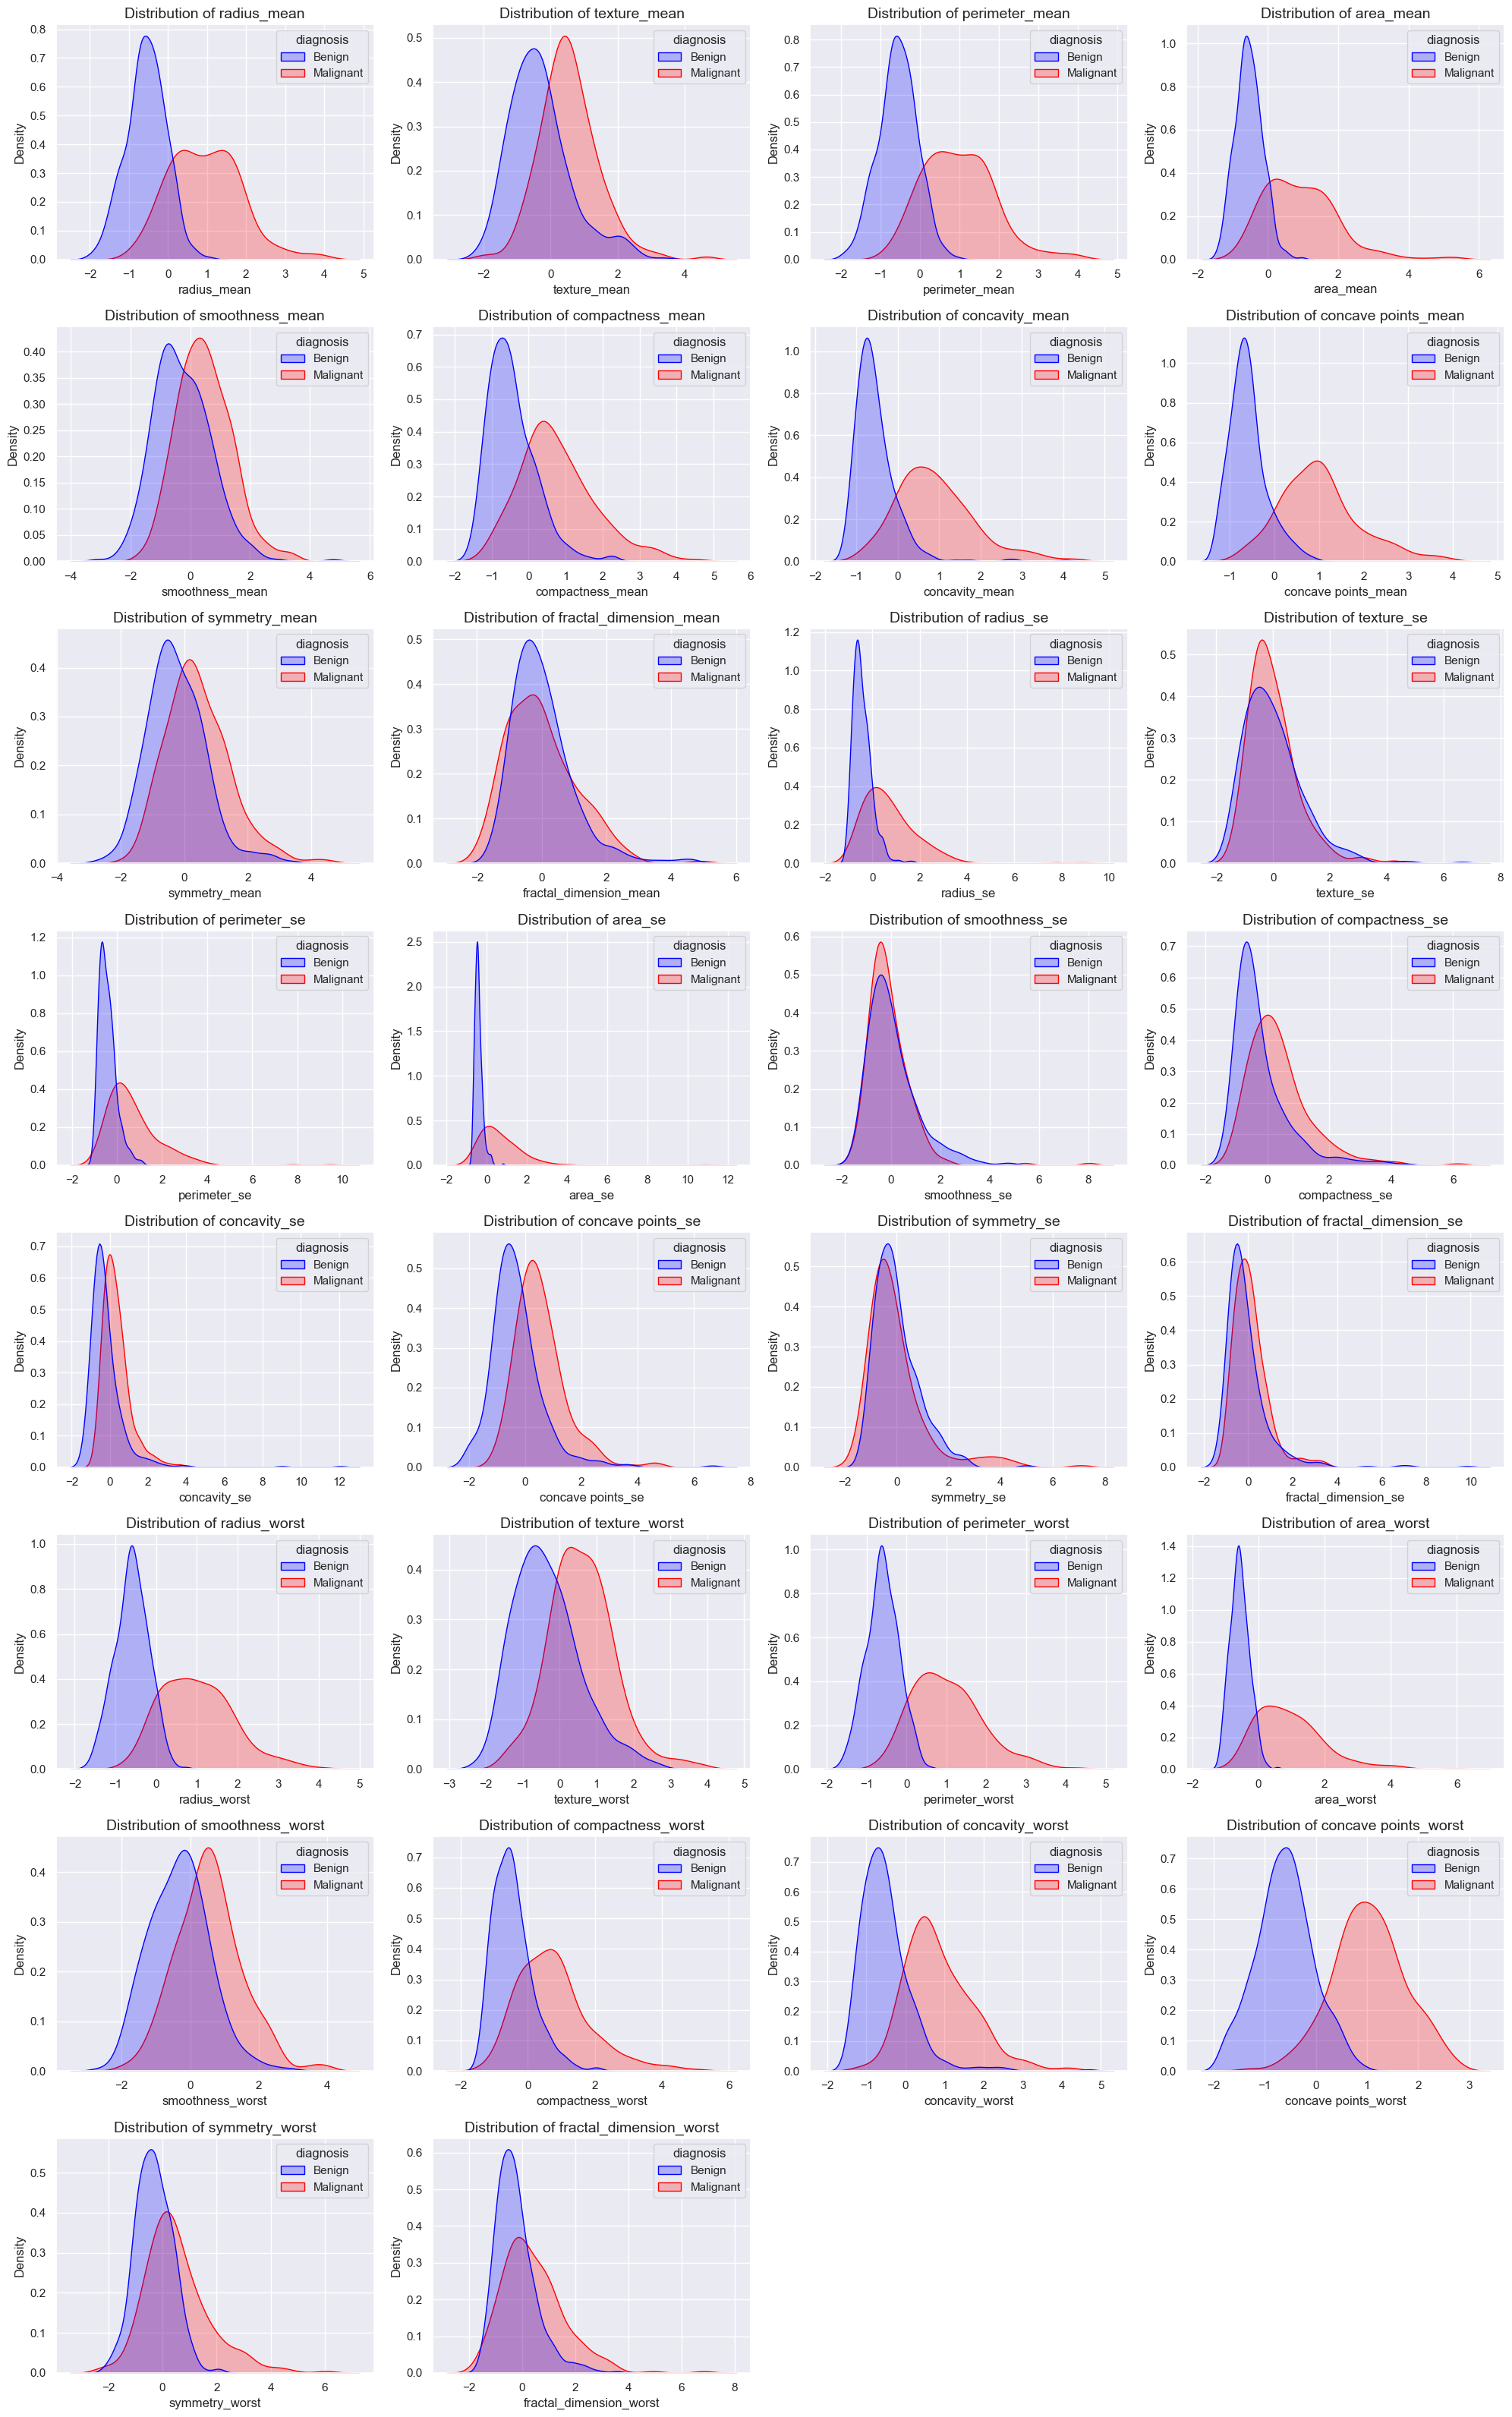

In [19]:
# KDE Plots for Each Attribute Showing Comparison Between Malignant and Benign Diagnosis

sns.set_theme(style="darkgrid")

# Save the original diagnosis values as integers 
original_diagnosis = df_processed['diagnosis'].copy()

# Temporarily convert 'diagnosis' to categorical for KDE plot
df_processed['diagnosis'] = df_processed['diagnosis'].map({0: 'Benign', 1: 'Malignant'})
df_processed['diagnosis'] = df_processed['diagnosis'].astype('category')

# List of continuous attributes (excluding `diagnosis`)
continuous_columns = df_processed.drop(columns=['diagnosis']).columns

# Set up the number of columns for the subplot grid
n_cols = 4
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculate required rows


fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()

for i, column in enumerate(continuous_columns):
    ax = axes[i]
    sns.kdeplot(
        data=df_processed,
        x=column,
        hue="diagnosis",
        fill=True,
        common_norm=False,  
        palette={"Malignant": "red", "Benign": "blue"},
        ax=ax,
    )
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xlabel(column)
    ax.set_ylabel('Density')

# Remove any empty subplots if there are more subplots than columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Reverts 'diagnosis' back to its original numeric values (0 and 1)
df_processed['diagnosis'] = original_diagnosis

### **Boxplots of Attributes**

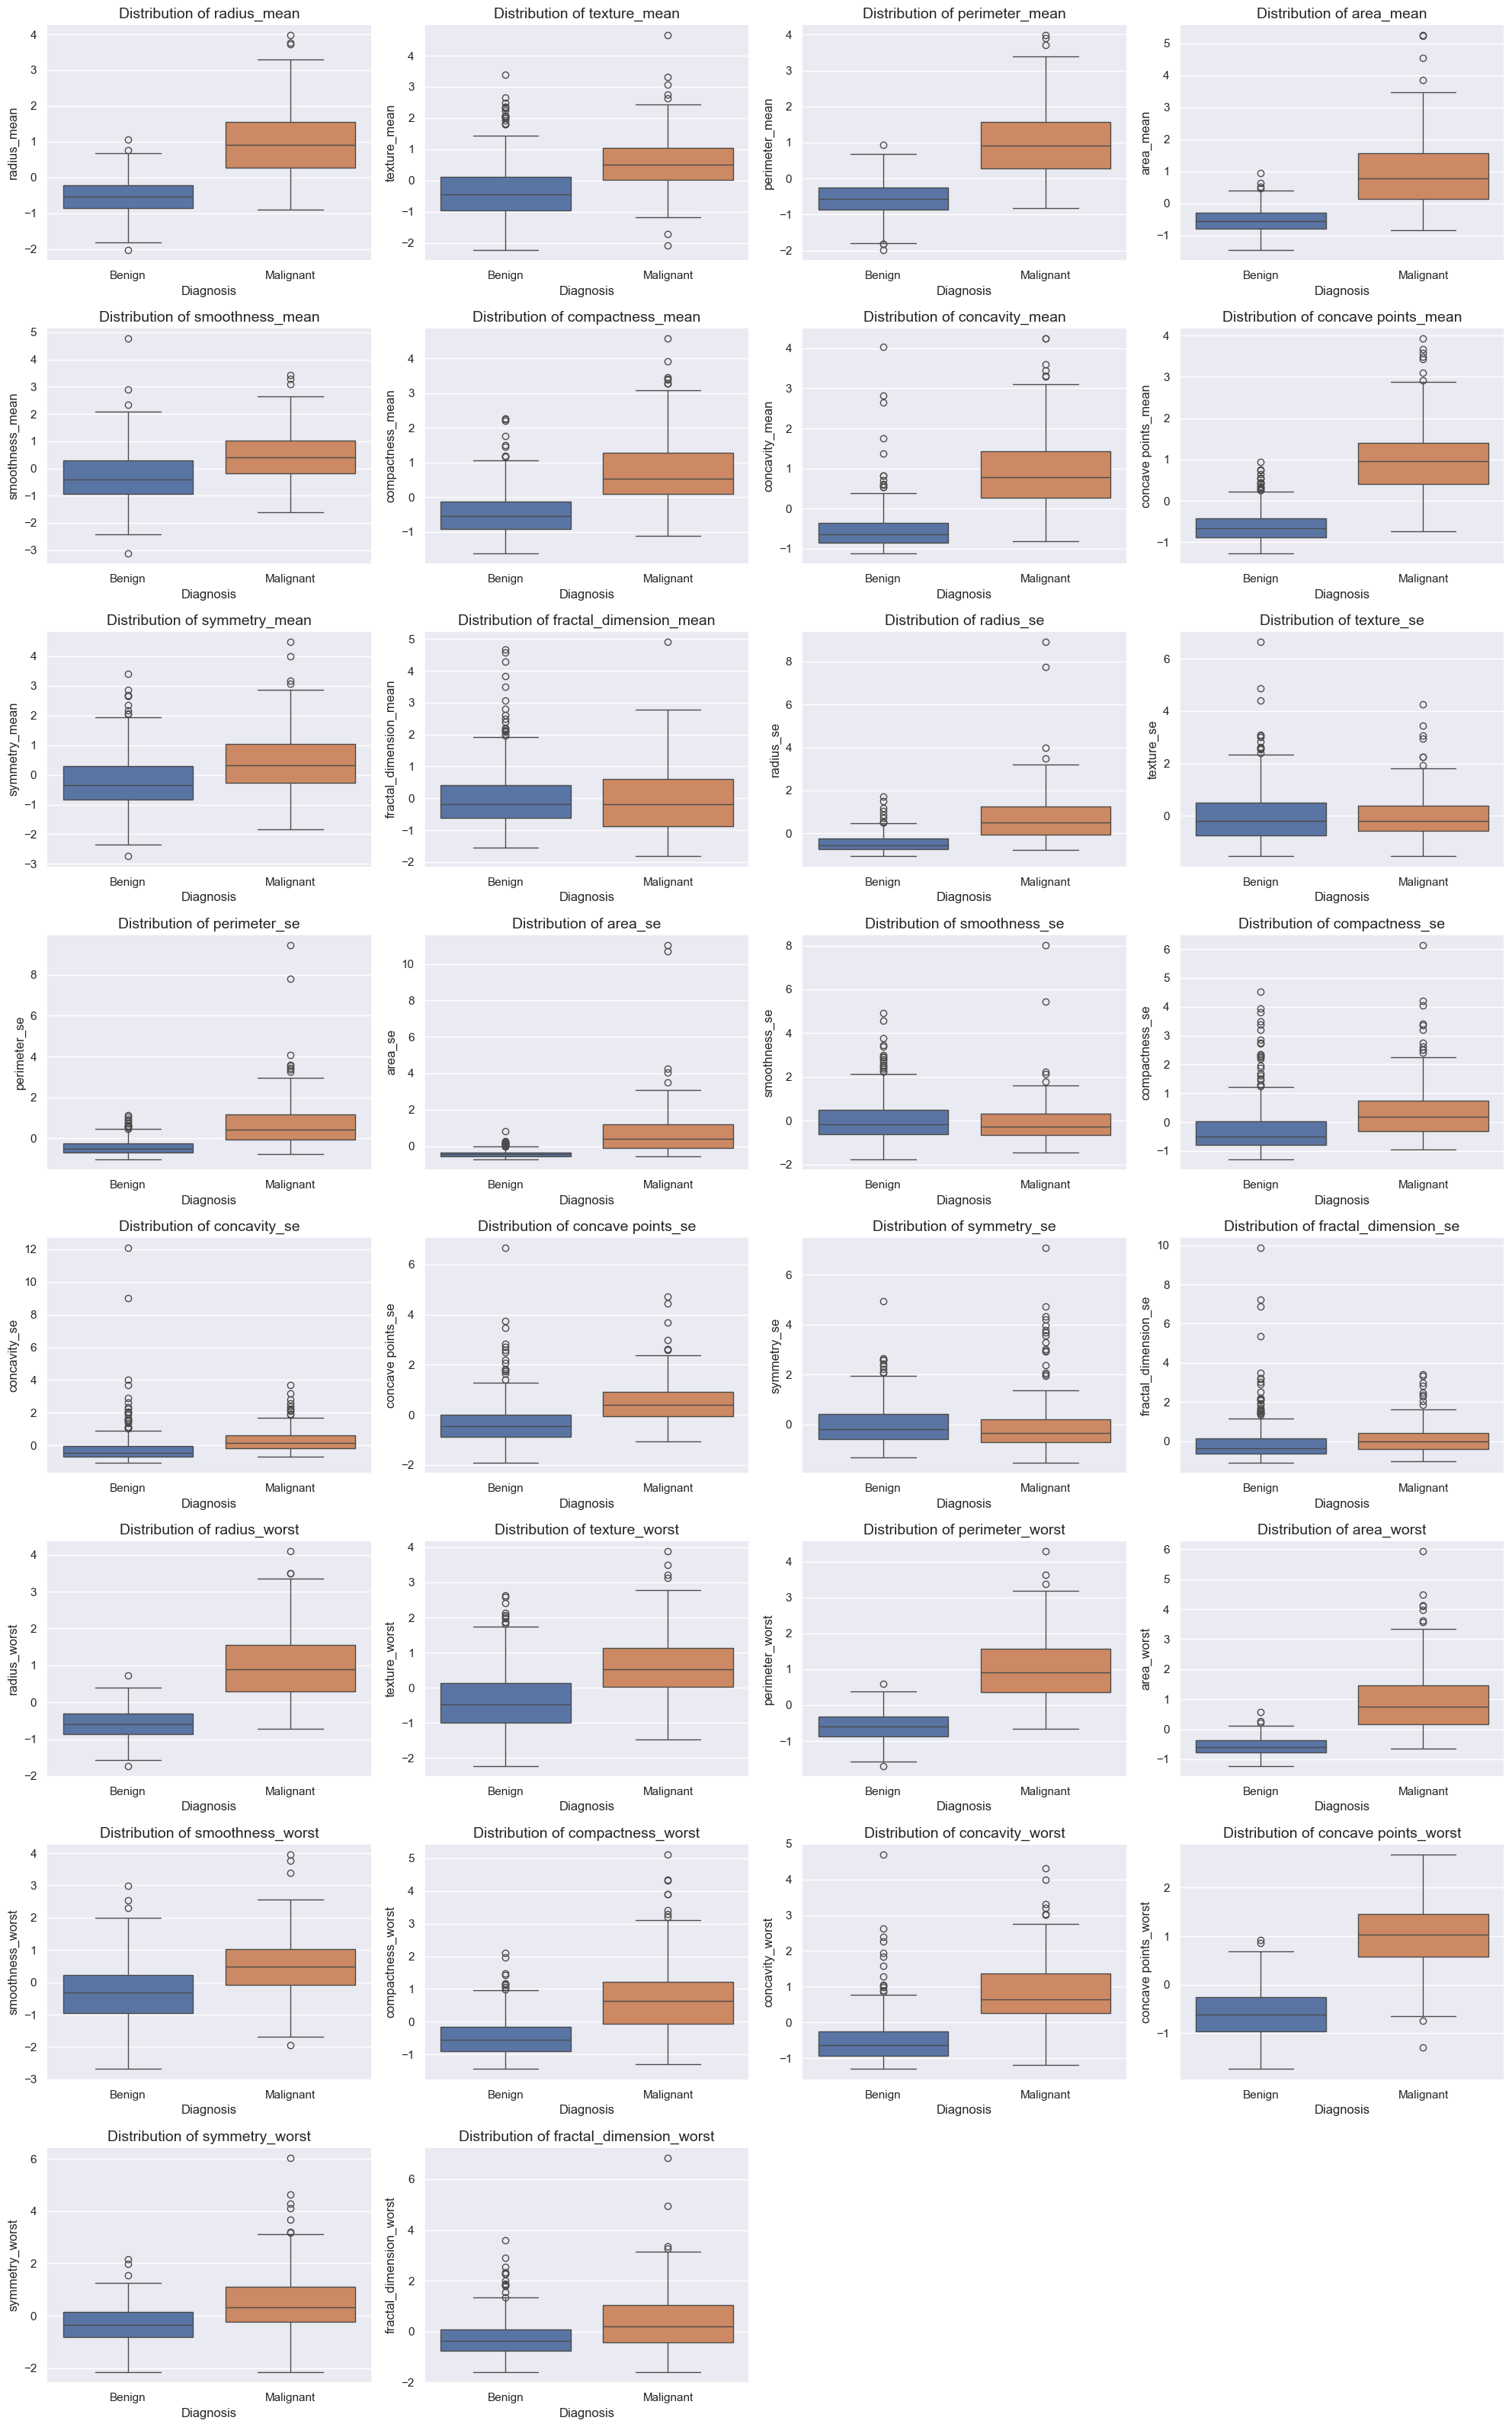

In [20]:
sns.set_theme(style="darkgrid")

# Save the original diagnosis values as integers 
original_diagnosis = df_processed['diagnosis'].copy()

# Temporarily convert 'diagnosis' to categorical for boxplot
df_processed['diagnosis'] = df_processed['diagnosis'].map({0: 'Benign', 1: 'Malignant'})
df_processed['diagnosis'] = df_processed['diagnosis'].astype('category')

# List of continuous attributes (excluding `diagnosis`)
continuous_columns = df_processed.drop(columns=['diagnosis']).columns

n_cols = 4
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()


for i, column in enumerate(continuous_columns):
    ax = axes[i]
    sns.boxplot(
        data=df_processed,
        x="diagnosis",
        y=column,
        hue="diagnosis",
        ax=ax,
    )
    ax.set_title(f'Distribution of {column}', fontsize=14)
    ax.set_xlabel('Diagnosis')
    ax.set_ylabel(column)
    
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

# Reverts 'diagnosis' back to its original numeric values (0 and 1)
df_processed['diagnosis'] = original_diagnosis

# **Modeling**

In [21]:
# Modules & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit Learn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [22]:
# Path
path = '../Data/Processed/df_processed.csv'

# Reading csv file
df_processed = pd.read_csv(path)

# Displaying first 5 rows of dataframe
df_processed.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1


In [23]:
# Splitting Dataset for Modeling
X = df_processed.drop(columns=['diagnosis'])
y = df_processed['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### Deep and Thorough Analysis of Classification Results

#### 1. **Accuracy**:
   - **Accuracy**: 0.9737 (or 97.37%)
   - Accuracy is the proportion of correct predictions (both true positives and true negatives) out of all predictions. An accuracy of 97.37% is quite high and suggests that the model is doing well in distinguishing between the two classes (Malignant and Benign).
   
   **Interpretation**: This high accuracy indicates that the model is performing well overall. However, it’s essential to analyze precision, recall, and F1-score for both classes to ensure balanced performance, especially in cases of imbalanced data.

#### 2. **Class-wise Performance**:
   The results break down the performance metrics for each class (Benign and Malignant) separately. This helps identify whether the model is equally effective for both classes or if it’s biased toward one.

   #### **Class 0 (Benign)**:
   - **Precision**: 0.97
     - Precision measures the proportion of correctly predicted Benign instances out of all instances predicted as Benign. A precision of 97% for class 0 indicates that most of the instances predicted as Benign are truly Benign. Precision values close to 1 suggest that the model is relatively accurate when it predicts Benign.
     
   - **Recall**: 0.99
     - Recall (also known as sensitivity or true positive rate) measures the proportion of actual Benign instances that were correctly identified by the model. A recall of 99% indicates that the model is very effective at detecting most of the Benign cases.
     
   - **F1-Score**: 0.98
     - The F1-score is the harmonic mean of precision and recall. It balances both metrics and is a useful measure when the class distribution is imbalanced. An F1-score of 0.98 for Benign shows that the model performs excellently in terms of both precision and recall for this class.

   #### **Class 1 (Malignant)**:
   - **Precision**: 0.98
     - Precision of 98% for Malignant cases indicates that when the model predicts a case as Malignant, it is almost certainly correct. This is a very strong result.
     
   - **Recall**: 0.95
     - Recall of 95% for Malignant cases means that the model correctly identifies 95% of all actual Malignant instances. While slightly lower than the recall for Benign, this still indicates very strong performance for detecting Malignant cases.
     
   - **F1-Score**: 0.96
     - The F1-score of 0.96 for Malignant is very strong, reflecting a good balance between precision and recall, although it is slightly lower than the F1-score for Benign due to the slightly lower recall.

#### 3. **Macro Average**:
   - **Macro Average (Precision, Recall, F1-Score)**:
     - **Precision**: 0.97
     - **Recall**: 0.97
     - **F1-Score**: 0.97
   - The macro average calculates the mean of the precision, recall, and F1-score across both classes, treating them equally. The macro average values are 0.97 across all metrics, which reflects a balanced model with no significant bias toward one class. This reinforces that the model performs well for both Malignant and Benign cases, even if the class distribution might not be perfectly equal.

#### 4. **Weighted Average**:
   - **Weighted Average (Precision, Recall, F1-Score)**:
     - **Precision**: 0.97
     - **Recall**: 0.97
     - **F1-Score**: 0.97
   - The weighted average gives more importance to the larger class in the dataset. Since Benign has more instances (71 vs. 43 for Malignant), the weighted average takes this into account. The values of the weighted averages are identical to the macro average in this case, suggesting that the class distribution does not heavily influence the overall performance.

#### 5. **Support**:
   - **Support** indicates the number of instances of each class in the dataset used for evaluation.
     - **Class 0 (Benign)**: 71 instances
     - **Class 1 (Malignant)**: 43 instances
   - The support values show that there are more Benign cases in the dataset, which could lead to some potential class imbalance, though the model's performance metrics are still robust.

#### 6. **Interpretation of the Performance**:
   - The model exhibits **excellent performance**, with high precision, recall, and F1-scores for both classes, especially Benign (0.99 recall and 0.98 F1-score) and Malignant (0.95 recall and 0.96 F1-score). 
   - **Precision and Recall Trade-off**: The model performs slightly better in terms of precision for Malignant cases (0.98) compared to recall (0.95), meaning it is more confident when predicting Malignant, but may miss some Malignant cases. However, both precision and recall for both classes are highly acceptable in the context of medical diagnoses, where detecting Malignant cases (cancerous tumors) is critical, but it’s also crucial to avoid mislabeling too many Benign cases as Malignant.
   - **Balanced Performance**: The high macro and weighted averages indicate that the model is not biased toward one class, even though the support is somewhat imbalanced (more Benign cases than Malignant cases).

#### 7. **Overall Conclusion**:
   The model shows **outstanding performance** in terms of precision, recall, and F1-scores for both classes, making it a highly reliable classifier for this dataset. The slightly lower recall for Malignant cases (compared to Benign) may be an area for potential improvement, but the model still performs exceptionally well given the critical nature of the task, where detecting Malignant cases accurately is crucial. Given these results, this model would be considered a strong candidate for use in a real-world application for breast cancer diagnosis.


# **Explanation of Splitting Tables and Its Benefits for This Project**

#### What is Table Splitting in Database Design?
Table splitting is a database normalization technique used to organize data more efficiently by dividing a single table into multiple related tables. This process is guided by the principles of database normalization, particularly reducing redundancy and improving data integrity. In a normalized design, attributes that logically belong to separate entities or groups are stored in distinct tables, with relationships maintained through primary and foreign keys.

---

#### Why Split the `cancer_data` Table?
The `cancer_data` table contains numerous attributes, which can be grouped into logical categories, such as "mean attributes" (e.g., `radius_mean`, `texture_mean`) and "worst attributes" (e.g., `texture_worst`, `perimeter_worst`). Additionally, the diagnosis information represents a different concept from the measurable attributes.

Splitting this table into three tables—`cancer_cases`, `mean_attributes`, and `worst_attributes`—offers several advantages:

---

#### 1. **Improved Data Organization**
Separating the attributes into smaller, focused tables creates a clear structure, making it easier to understand and manage the data. Each table serves a specific purpose:
- **`cancer_cases`**: Stores general information, such as diagnosis.
- **`mean_attributes`**: Captures average measurements for the case.
- **`worst_attributes`**: Captures the worst-case measurements for the case.

This organization aligns the database schema with the conceptual model of the data.

---

#### 2. **Reduced Redundancy and Improved Storage Efficiency**
In the original `cancer_data` table, all attributes are stored together, even though some may not always be relevant. For example, if a case lacks certain "mean" or "worst" measurements, the table would still allocate space for them, leading to wasted storage. By splitting the data, attributes are stored only where they belong, reducing unnecessary duplication.

---

#### 3. **Enhanced Data Integrity**
Normalization ensures that updates, deletions, and insertions are consistent across the database. For example, if the diagnosis of a case needs to be updated, the change only affects the `cancer_cases` table, without risking accidental changes to unrelated attributes. Relationships between tables, enforced by foreign keys, maintain data consistency.

---

#### 4. **Scalability and Extensibility**
As the project evolves, new attributes or measurements may need to be added. With the split schema, new tables can be introduced without altering the existing structure. For instance, if additional diagnostic categories or new types of measurements are added, they can be incorporated into new tables without disrupting existing data or queries.

---

#### 5. **Streamlined Querying**
Splitting the table simplifies certain queries. For instance:
- A query focused on diagnoses only needs to access the `cancer_cases` table.
- Analysis of average measurements can use the `mean_attributes` table directly.

This targeted approach improves query performance and reduces unnecessary processing.

---

#### 6. **Facilitates Future Analysis and Insights**
The split design provides a foundation for advanced analytics. For example:
- Relationships between diagnosis and specific attributes can be explored by joining the relevant tables.
- Aggregations, such as averages or correlations between "mean" and "worst" attributes, can be performed with greater precision.

---

#### Summary
By splitting the `cancer_data` table into `cancer_cases`, `mean_attributes`, and `worst_attributes`, the database design adheres to the principles of normalization. This structure improves organization, reduces redundancy, enhances data integrity, and provides flexibility for future growth and analysis. These benefits make the database easier to maintain and optimize for querying, making it an ideal choice for managing a comprehensive dataset like this one.


### SQL TABLES:
```sql
CREATE TABLE cancer_cases (
    case_id INT AUTO_INCREMENT PRIMARY KEY,
    diagnosis INT
);

CREATE TABLE mean_attributes (
    case_id INT,
    radius_mean FLOAT,
    texture_mean FLOAT,
    perimeter_mean FLOAT,
    area_mean FLOAT,
    smoothness_mean FLOAT,
    compactness_mean FLOAT,
    concavity_mean FLOAT,
    concave_points_mean FLOAT,
    symmetry_mean FLOAT,
    fractal_dimension_mean FLOAT,
    FOREIGN KEY (case_id) REFERENCES cancer_cases(case_id)
);

CREATE TABLE worst_attributes (
    case_id INT,
    texture_worst FLOAT,
    perimeter_worst FLOAT,
    area_worst FLOAT,
    smoothness_worst FLOAT,
    compactness_worst FLOAT,
    concavity_worst FLOAT,
    concave_points_worst FLOAT,
    symmetry_worst FLOAT,
    fractal_dimension_worst FLOAT,
    FOREIGN KEY (case_id) REFERENCES cancer_cases(case_id)
);
```

### Explanation of SQL Tables, Primary Key, and Foreign Key Selection

#### Overview of the Tables:
The database schema consists of three tables: 
1. `cancer_cases`: Stores general information related to each case (e.g., diagnosis).
2. `mean_attributes`: Contains the mean values of various cancer attributes for each case.
3. `worst_attributes`: Stores the worst-case values of the same cancer attributes.

---

#### Why `case_id` is the Primary Key:
A **primary key** uniquely identifies each record within a table. In this schema, the `case_id` is chosen as the primary key for the following reasons:

1. **Uniqueness**: Each cancer case must be uniquely identified. By using `case_id` as an `AUTO_INCREMENT` field, each case will automatically receive a unique identifier, ensuring there is no ambiguity when referencing a specific case.

2. **Consistency Across Tables**: The `case_id` serves as the link between the three tables. It is the common field that connects data stored in `cancer_cases`, `mean_attributes`, and `worst_attributes`. This makes it the ideal candidate for the primary key.

3. **Simplifies Joins**: Since `case_id` will be the same across all three tables, it allows easy joining of the tables when queries need to combine data from multiple tables (e.g., querying both the diagnosis and the corresponding attribute values).

4. **Data Integrity**: Using an auto-increment primary key like `case_id` ensures that there is a consistent, non-null, and unique identifier for each record, which is crucial for maintaining data integrity across tables.

---

#### Why Foreign Keys are Selected:
**Foreign keys** establish relationships between tables and ensure referential integrity, meaning that data across tables remains consistent. The foreign keys in this schema are used to maintain the relationship between `cancer_cases`, `mean_attributes`, and `worst_attributes`.

1. **Linking Tables**: 
   - In the `mean_attributes` and `worst_attributes` tables, `case_id` is used as a foreign key referencing the `case_id` in the `cancer_cases` table. This establishes a direct connection between the attributes of a cancer case and the general information (e.g., diagnosis) stored in the `cancer_cases` table.
   - The foreign key ensures that any attributes stored in `mean_attributes` or `worst_attributes` must correspond to an existing `case_id` in the `cancer_cases` table. This avoids orphaned records—i.e., records in the attribute tables that do not have a corresponding case in the `cancer_cases` table.

2. **Enforcing Referential Integrity**:
   - With the foreign key constraint, if an attempt is made to insert or update an attribute record in `mean_attributes` or `worst_attributes` without a corresponding `case_id` in `cancer_cases`, MySQL will reject the operation, preserving data integrity.
   - If a case record is deleted from `cancer_cases`, the foreign key constraint can be set to automatically delete the corresponding records in the `mean_attributes` and `worst_attributes` tables (depending on the `ON DELETE CASCADE` action), ensuring that the database does not contain orphaned data.

3. **Structured Data Relationships**:
   - The foreign key relationship helps to reinforce that each set of attributes (mean or worst) belongs to a specific cancer case. This relationship models the real-world connection between a cancer case and its associated attributes, and this structure aids in querying and reporting data based on the cancer case as the primary entity.

4. **Maintaining Consistency**:
   - The foreign key ensures that any changes to the `cancer_cases` table (e.g., deleting or updating a case record) will be reflected across the `mean_attributes` and `worst_attributes` tables. This helps keep data synchronized and prevents anomalies, such as attribute data remaining for deleted cases.

---

#### Example Use Case:
Imagine a situation where a new cancer case is added, and its associated attributes (mean and worst) are inserted into the corresponding tables. The `case_id` generated in the `cancer_cases` table will be used as a foreign key to associate the corresponding attribute values in both the `mean_attributes` and `worst_attributes` tables. This way, you ensure that each set of attributes is accurately tied to a specific cancer case.

For instance:
1. Insert a new case into the `cancer_cases` table with a `diagnosis` value.
2. The `case_id` (let's say `case_id = 1`) is automatically assigned to this record.
3. The corresponding mean and worst attributes for case `1` are inserted into the `mean_attributes` and `worst_attributes` tables, with the foreign key `case_id = 1` linking them to the `cancer_cases` table.

---

#### Summary:
- **Primary Key (`case_id`)**: Uniquely identifies each cancer case, ensures consistent data across all related tables, and facilitates efficient querying and joining of tables.
- **Foreign Keys (`case_id` in `mean_attributes` and `worst_attributes`)**: Establish relationships between the tables, maintain referential integrity, and prevent data inconsistencies by ensuring that attribute data corresponds to valid cancer case records.


# **The Following Highlights SQL Skills:**

### **1. Demonstration of Basic SQL Proficiency**

A query was executed to retrieve the `radius_mean` values from the `mean_attributes` table where the `radius_mean` exceeded 15. The results were initially returned as 173 rows, but they included duplicate values. To refine the output, the `DISTINCT` keyword was added to ensure that only unique `radius_mean` values were included. This adjustment reduced the result set to 159 rows. Additionally, the results were ordered in descending order to display the largest values first. The final query is as follows:

```sql
SELECT DISTINCT radius_mean
FROM mean_attributes
WHERE radius_mean > 15
ORDER BY radius_mean DESC;
```

![Basic Query](../Assets/basicsql.png)

A query was also performed to group the diagnosis by the total counts in the category.

```sql
SELECT COUNT(*), diagnosis 
FROM cancer_cases 
GROUP BY diagnosis;
```

![Basic Query](../Assets/groupby.png)


### **2. Demonstration of Data Manipulation**

This example demonstrates SQL-based data manipulation by performing two essential operations: inserting new records into the database and validating the data using a query. These steps showcase an understanding of relational database management and the ability to manage and analyze data effectively.

To begin, new records were added to the `cancer_cases` and `mean_attributes` tables using the `INSERT INTO` command. In the `cancer_cases` table, three new entries were inserted, each containing a `diagnosis` value. The `case_id` column, which is an `AUTO_INCREMENT` primary key, automatically assigned the values 570, 571, and 572 to these entries:

```sql
INSERT INTO cancer_cases (diagnosis)
VALUES (1), (0), (1);
```

Next, corresponding rows were added to the `mean_attributes` table. These rows included detailed measurements, such as `radius_mean`, `texture_mean`, and `area_mean`, along with other attributes. The `case_id` column ensured these rows were correctly associated with the corresponding entries in the `cancer_cases` table:

```sql
INSERT INTO mean_attributes (
    case_id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, 
    compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean
)
VALUES 
(570, 15.50, 22.20, 105.0, 800.0, 0.1100, 0.2200, 0.3000, 0.1200, 0.2500, 0.0800),
(571, 18.30, 25.10, 130.0, 1200.0, 0.1020, 0.1900, 0.2400, 0.0900, 0.2000, 0.0700),
(572, 14.00, 18.50, 90.0, 600.0, 0.1150, 0.2100, 0.2800, 0.1100, 0.2400, 0.0750);
```

To validate the success of the insertion, a query was executed to retrieve all rows from the `mean_attributes` table where the `case_id` was greater than 569. This ensured that the newly added records were accurately reflected in the database:

```sql
SELECT * FROM mean_attributes WHERE case_id > 569;
```

The query returned the expected rows, confirming that the data was inserted correctly and matched the intended structure.

This example highlights the following key aspects of data manipulation in SQL:
1. **Data Insertion**: The use of the `INSERT INTO` statement to populate tables with new data.
2. **Validation Queries**: Employing `SELECT` statements to confirm the accuracy and integrity of the data.
3. **Referential Integrity**: Ensuring that the foreign key constraint between `case_id` in the `cancer_cases` and `mean_attributes` tables was maintained.

Overall, this exercise demonstrates the practical application of SQL for data insertion and verification, reinforcing essential database management skills.

![Worst Attributes Query](../Assets/datamanipulation.png)

### 3. **Demonstration of Basic Inner Join**

This SQL query demonstrates proficiency in **JOINs** and **GROUP BY** operations. The query performs the following tasks:

1. **JOIN Operation**:  
   It uses an `INNER JOIN` between the `cancer_cases` and `mean_attributes` tables based on the `case_id` column. This ensures that only rows with matching `case_id` values in both tables are included in the results.

2. **Grouping**:  
   The query groups the results by the `diagnosis` column from the `cancer_cases` table. This means that the data will be aggregated based on whether the diagnosis is `0` (benign) or `1` (malignant).

3. **Aggregation with `AVG()`**:  
   For each diagnosis group, the query calculates the average (`AVG()`) of the `radius_mean` and `texture_mean` columns from the `mean_attributes` table. This aggregation provides insights into the central tendency of these attributes for each diagnosis category.

4. **Result Output**:  
   The output consists of two columns: `diagnosis` (showing whether the diagnosis is benign or malignant) and the averages of `radius_mean` and `texture_mean` for each diagnosis group. 

This query is useful for comparing the average values of key attributes (`radius_mean`, `texture_mean`) between different diagnosis categories. It showcases the ability to perform data manipulation with relational tables, providing a clear summary of how these attributes differ across diagnosis types.

![Worst Attributes Query](../Assets/innerjoin.png)

### **More Joins:**

#### **Query 1: LEFT JOIN between `cancer_cases` and `worst_attributes`**

```sql
SELECT cancer_cases.case_id, cancer_cases.diagnosis, worst_attributes.texture_worst, worst_attributes.perimeter_worst
FROM cancer_cases
LEFT JOIN worst_attributes ON cancer_cases.case_id = worst_attributes.case_id;
```

This query demonstrates the use of a **LEFT JOIN** to combine data from the `cancer_cases` and `worst_attributes` tables.

- **LEFT JOIN Operation**: The `LEFT JOIN` ensures that all rows from the `cancer_cases` table are returned, even if there is no matching row in the `worst_attributes` table. If a case from `cancer_cases` does not have corresponding data in `worst_attributes`, the values for `texture_worst` and `perimeter_worst` will be `NULL` for that case.
- **Result Output**: The query retrieves four columns: `case_id`, `diagnosis`, `texture_worst`, and `perimeter_worst`. The `diagnosis` indicates whether the case is benign or malignant. The `texture_worst` and `perimeter_worst` are attributes from the `worst_attributes` table and are selected for each case. The query ensures that even if a case does not have data in `worst_attributes`, it still appears in the result set.

---

#### **Query 2: INNER JOIN between `cancer_cases`, `mean_attributes`, and `worst_attributes`**

```sql
SELECT cancer_cases.case_id, cancer_cases.diagnosis, mean_attributes.radius_mean, worst_attributes.texture_worst
FROM cancer_cases
INNER JOIN mean_attributes ON cancer_cases.case_id = mean_attributes.case_id
INNER JOIN worst_attributes ON cancer_cases.case_id = worst_attributes.case_id;
```

In this query, an **INNER JOIN** is used between `cancer_cases`, `mean_attributes`, and `worst_attributes` tables.

- **INNER JOIN Operation**: The `INNER JOIN` retrieves only the rows that have matching values in both the `cancer_cases` table and the `mean_attributes` and `worst_attributes` tables. This means that only the cases that have data in all three tables will be included in the result.
- **Result Output**: The query selects four columns: `case_id`, `diagnosis`, `radius_mean`, and `texture_worst`. It returns the case IDs and diagnosis along with the corresponding `radius_mean` from `mean_attributes` and `texture_worst` from `worst_attributes`. If a case doesn't have matching data in both attribute tables, it will be excluded from the result.

---

#### **Query 3: Filtering data using conditions on `mean_attributes` and `worst_attributes`**

```sql
SELECT cancer_cases.case_id, cancer_cases.diagnosis, mean_attributes.radius_mean, worst_attributes.texture_worst
FROM cancer_cases
INNER JOIN mean_attributes ON cancer_cases.case_id = mean_attributes.case_id
INNER JOIN worst_attributes ON cancer_cases.case_id = worst_attributes.case_id
WHERE mean_attributes.radius_mean > 15 AND worst_attributes.texture_worst < 25;
```
This query builds on the previous one but introduces a **WHERE clause** to filter the results based on specific conditions.

- **WHERE Clause**: The conditions `mean_attributes.radius_mean > 15` and `worst_attributes.texture_worst < 25` limit the results to only those cases where the `radius_mean` is greater than 15 and the `texture_worst` is less than 25. This further narrows down the data to meet these criteria.
- **Result Output**: The query returns case IDs, diagnosis, `radius_mean`, and `texture_worst` only for the rows where both conditions are true. This allows a more focused analysis of the dataset based on specific characteristics of the cancer cases.

---

#### **Query 4: Self Join to compare `radius_mean` between two different cases**

```sql
SELECT a.case_id AS case_id_1, b.case_id AS case_id_2, a.radius_mean, b.radius_mean
FROM mean_attributes a
INNER JOIN mean_attributes b ON a.radius_mean > b.radius_mean;
```

This query performs a **self join**, which is when a table is joined with itself. 

- **Self Join**: In this query, the `mean_attributes` table is joined with itself. The aliases `a` and `b` are used to refer to two different instances of the same table. The condition `a.radius_mean > b.radius_mean` ensures that each pair of cases is compared, where the `radius_mean` of `a` is greater than that of `b`.
- **Result Output**: The query returns pairs of case IDs (`case_id_1` and `case_id_2`) where the `radius_mean` of `case_id_1` is greater than `case_id_2`. It also shows the `radius_mean` values for both cases in each pair. This is useful for comparing cases with different radii measurements, providing insights into how one case compares to another in terms of the mean radius.



### **4. Demonstration of Subquery and Window Function**

#### **Subquery and Window Function Example**

```sql
SELECT 
    case_id,
    diagnosis,
    radius_mean,
    texture_mean,
    AVG(radius_mean) OVER (PARTITION BY diagnosis) AS avg_radius_by_diagnosis,
    (SELECT MAX(radius_mean) FROM mean_attributes WHERE diagnosis = cancer_cases.diagnosis) AS max_radius_by_diagnosis
FROM 
    cancer_cases
INNER JOIN mean_attributes ON cancer_cases.case_id = mean_attributes.case_id;
```
---

### **Analysis and Explanation:**

#### **Subquery Usage:**

- The query uses a **subquery** to find the maximum value of `radius_mean` for each diagnosis (benign or malignant) in the `mean_attributes` table.
- The subquery is written as:
    (SELECT MAX(radius_mean) FROM mean_attributes WHERE diagnosis = cancer_cases.diagnosis) AS max_radius_by_diagnosis
    - This subquery returns the maximum `radius_mean` for each diagnosis type (benign or malignant) and is correlated with the outer query by the condition `WHERE diagnosis = cancer_cases.diagnosis`. This ensures that the subquery retrieves the maximum value for the same diagnosis type as the outer query row.
    - The result is aliased as `max_radius_by_diagnosis`, providing the maximum radius value for each case’s diagnosis type.

#### **Window Function Usage:**

- The query also demonstrates the use of a **window function**: `AVG(radius_mean) OVER (PARTITION BY diagnosis) AS avg_radius_by_diagnosis`.
    - The window function calculates the average `radius_mean` for all rows that share the same `diagnosis` value.
    - The `PARTITION BY diagnosis` clause groups the data by the `diagnosis` column (benign vs malignant), and for each group, it calculates the average of `radius_mean`.
    - This window function provides the average radius for each diagnosis category without needing to group the data in the traditional way with a `GROUP BY` clause. Instead, it allows every row to retain its original data while adding the computed average value for the respective group.

#### **INNER JOIN:**

- The `INNER JOIN` is used to combine the `cancer_cases` table with the `mean_attributes` table based on the `case_id` column, ensuring that each case's attributes are pulled together from both tables.

#### **Result Output:**

- The query returns:
  1. `case_id`: The unique identifier for each case.
  2. `diagnosis`: The diagnosis for the case (benign or malignant).
  3. `radius_mean`: The radius mean for the case.
  4. `texture_mean`: The texture mean for the case.
  5. `avg_radius_by_diagnosis`: The average `radius_mean` value for cases within the same diagnosis category (benign or malignant).
  6. `max_radius_by_diagnosis`: The maximum `radius_mean` value for cases with the same diagnosis type.
  
- The results provide both the individual `radius_mean` for each case as well as aggregate statistics (average and maximum) based on the diagnosis type.

---

### **Summary:**

- The query combines a **subquery** and a **window function** to enhance the analysis. The subquery helps to retrieve the maximum `radius_mean` per diagnosis group, and the window function computes the average `radius_mean` for each diagnosis group while keeping the individual records intact.
- This combination of techniques allows for a detailed analysis that provides both individual case-level values and group-level statistics (maximum and average) in a single query result.

![Worst Attributes Query](../Assets/windowfxn.png)

# **Tableau**

![Area Mean Viz](../Tableau/areamean.png)